In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 課題1
## 2変数正規分布に従う乱数をプロットする
- そのままプロット
- 標準化してプロット
    - サンプルからのμ, Σを使用して計算
    - パラメータからのμ, Σを使用して計算
- 無相関化してプロット

In [2]:
def standardize(data, mean=None, cov=None):
    if mean is None:
        mean = data.mean(axis=0)

    if cov is None:
        cov = np.cov(data.T)

    return (data - mean) / np.sqrt(np.diag(cov))


def decorrelate(data):
    cov = np.cov(data.T)
    la, eig_s = np.linalg.eig(cov)
    return np.dot(eig_s.T, data.T).T


def plot_data(data, title):
    print(title)
    print(f'平均:\n{data.mean(axis=0)}\n')
    print(f'共分散行列:\n{np.cov(data.T)}\n')
    sns.jointplot(data[:, 0], data[:, 1], s=15)
    plt.show()

In [3]:
def transform(data, title, method, mean, sigma):
    if method is None:
        return data
    
    if title == 'standardization(parameter\'s μ, Σ)':
        return method(data, mean, sigma)

    return method(data)


methods = {'original': None,
           'standardization(sample\'s μ, Σ)': standardize,
           'standardization(parameter\'s μ, Σ)': standardize,
           'decorrelation': decorrelate}

In [4]:
mean = np.array([-5, 5])
sigma = np.array([[15, 3], [3, 4]])
data = np.random.multivariate_normal(mean, sigma, 5000)

original
平均:
[-5.04451028  5.00162848]

共分散行列:
[[15.24148903  2.99216452]
 [ 2.99216452  3.96436803]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


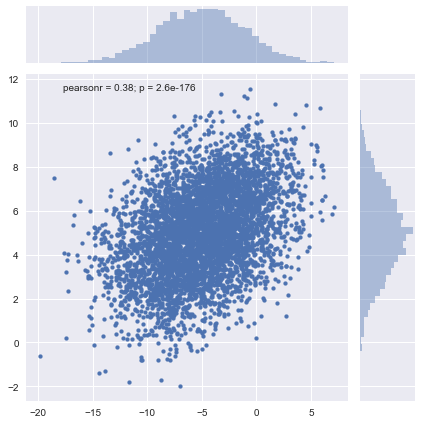

standardization(sample's μ, Σ)
平均:
[ 2.39684939e-15 -3.98792110e-16]

共分散行列:
[[1.         0.38493268]
 [0.38493268 1.        ]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


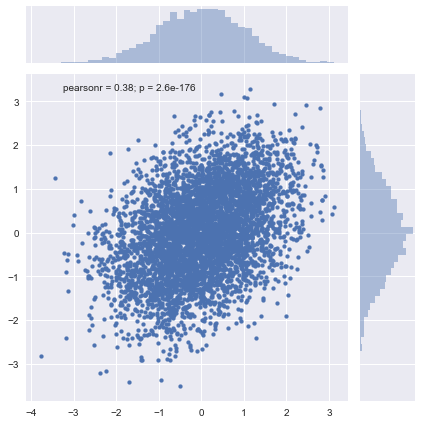

standardization(parameter's μ, Σ)
平均:
[-0.0114925   0.00081424]

共分散行列:
[[1.01609927 0.38628678]
 [0.38628678 0.99109201]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


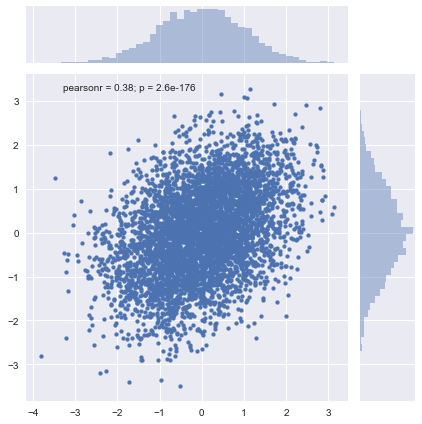

decorrelation
平均:
[-3.68714601  6.07192932]

共分散行列:
[[1.59862202e+01 1.86199437e-16]
 [1.86199437e-16 3.21963682e+00]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


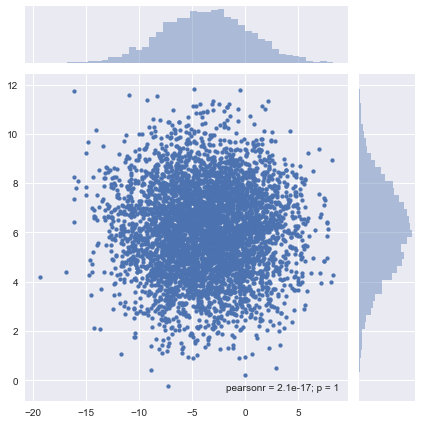

In [5]:
for title, method in methods.items():
    transformed_data = transform(data, title, method, mean, sigma)
    plot_data(transformed_data, title)

# 課題2
## 多変数正規分布の混合分布と、その識別境界をプロットする

In [6]:
a = np.random.randint(1, 3, 10000)
distribution1_count = len(a[a == 1])
distribution2_count = len(a[a == 2])

mean1 = np.array([-5, 5])
sigma1 = np.array([[10, 2], [2, 4]])
data = np.random.multivariate_normal(mean1, sigma1, distribution1_count)

mean2 = np.array([0, 0])
sigma2 = np.array([[10, 5], [5, 4]])
data = np.vstack((data, np.random.multivariate_normal(mean2, sigma2, distribution2_count)))

mixture_distribution
平均:
[-2.53900789  2.5184553 ]

共分散行列:
[[16.64396917 -2.81709018]
 [-2.81709018 10.41256824]]



/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


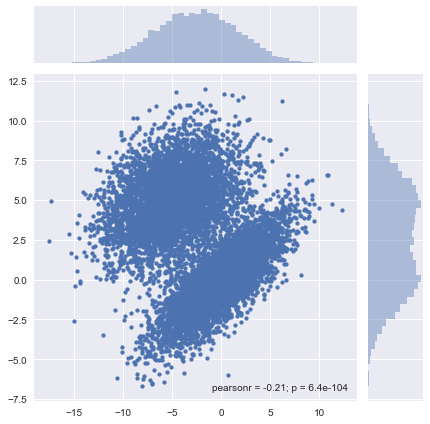

In [7]:
plot_data(data, 'mixture_distribution')

In [11]:
sigma1_inv = np.linalg.inv(sigma1)
sigma2_inv = np.linalg.inv(sigma2)
p_c1 = distribution1_count / len(data)
p_c2 = distribution2_count / len(data)
square_term = data.dot(sigma1_inv - sigma2_inv).dot(data.T)
one_term = (2 * mean1.dot(sigma1_inv) - 2 * mean2.dot(sigma2_inv)).dot(data.T)
const_term = 2 * np.log(p_c1 / p_c2) - np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2)) \
             + mean2.dot(sigma2_inv).dot(mean2.T) - mean1.dot(sigma1_inv).dot(mean1.T)

decision_surface = square_term + one_term + const_term

In [18]:
decision_surface.shape

(10000, 10000)